# DAY 1: Regression


### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 22th, 2:00 pm Kigali Time

**First name**: _________________________________________________________


**Last name**: _____________


## Learning Goals:

1. become familiar with sklearn libraries
2. understand, fit and predict using linear and polynomial regression
3. identify overfitting/underfitting 
4. split your data in train and test splits

In [ ]:
# import the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### We include some auxiliary functions here that we will need to use later (no need to read in details!)

In [ ]:
''' Function to generate a toy dataset '''
def generate_toy_data(n_points=20, noise_std=0.25):

    x = np.linspace(-5, 5, n_points)

    #define a function relating input to output
    f = lambda x: 0.01 * x**3

    #generate noisy training labels
    y = f(x) + np.random.normal(0, noise_std, n_points)
    
    return x, y

## 1. Linear Regression (using sklearn library)

`sklearn` is a machine learning library for python. One nice property is that models share the same interface (every model has methods like `.fit`, `.predict` and `.predict_proba`).

Let's fit a linear regressor to some data and get used to the `sklearn` library functions.


In [ ]:
# 0. generate a data set for doing regression
x, y = generate_toy_data() 

# split our data set into training and testing using a the 'train_test_split' function from sklearn
# see the documentation for 'train_test_split' here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

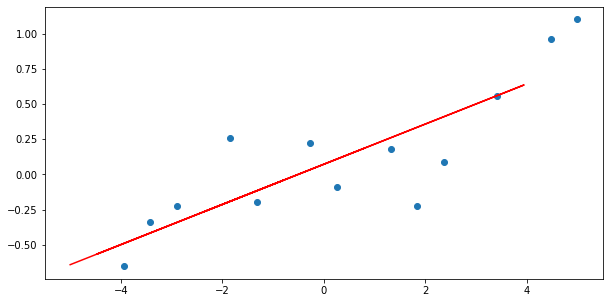

In [ ]:
# 1. Instantiate an Linear Regression model object
linear_regressor = LinearRegression()
# 2. Fit model to the training data
linear_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
# 3. Make prediction on test input data 
y_pred = linear_regressor.predict(x_test.reshape(-1,1))
# 4. Visualize results
f, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(x_train, y_train) # scatter plot the training data
ax.plot(x_test, y_pred, 'r')  # plot the learned linear regression function by plotting the predictions
plt.show() # display the figure

**Exercise 1:** Compute the Mean Square Error (MSE) of your model on the training dataset and on the testing dataset.

In [ ]:
# Hint: you can use a pre-defined MSE function in the library documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#
## COMPLETE
# traing_mse = ...
# test_mse = ...
#
# print('MSE on training data is: {}'.format(training_mse))
# print('MSE on test data is: {}'.format(test_mse))

**Exercise 2:** Is a linear regressor a good model for this data? Why or why not? Support your answer using concepts you learned from lecture, the visualizations of the data and the model, as well as the MSE.

Next, let's implement a polynomial regression model for the same dataset.

## 2. Polynomial Regression (using sklearn library)

In this Section, we will experiment with fitting polynomial regression model of various degrees. We will explore how the choice of polynomial degree relates to underfitting and overfitting.

**Exercise 3:** Fit polynomial regression models with degrees equal to 2, 4, and 16. Visualize each model along with the training data. Compute the training and test MSE for each model. 

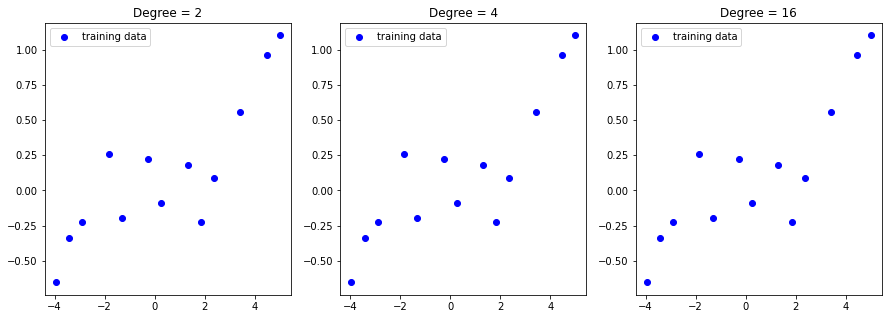

In [ ]:
# Make a list of polynomial degrees we want to try
poly_degree = np.array([2, 4, 16])

# Visualize the three models in a figure with one row and 3 columns, with size 15x5
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the polynomial degrees and the subplots in the figure
for i in range(3):

  ax[i].scatter(x_train, y_train, color='blue', label='training data') # scatter plot the training data

  # Step 1: 
  # Instantiate a sklearn PolynomialFeatures model of degree=poly_degree[i] 
  # and transform both the training and the testing data to add polynomial features to our datasets.
  # (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
  ## COMPLETE
  #
  # Step 2:
  # Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
  # You should set fit_intercept=False for this LinearRegression model, since the intercept is already
  # generated by PolynomialFeatures
  ## COMPLETE
  #
  # Step 3:
  # Plot the learned polynomial regression model by plotting the model prediction against the training input 
  # COMPLETE
  #
  # ax[i].plot(x_train, y_train_pred, color='red', label='polynomial model')
  #
  # Step 4:
  # Compute and print the training and test MSE.
  # COMPLETE
  #
  # mse_train = ...
  # mse_test = ...
  #
  # print('For degree {}, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(poly_degree[i], mse_train, mse_test))

  ax[i].set_title('Degree = {}'.format(poly_degree[i])) # set the title of the ith subplot
  ax[i].legend(loc='best') # display the legend for the plot

plt.show() # display the figure

**Exercise 4:** Visually, which function is the most appropriate for the data? Why? Support your answer using concepts you learned in lecture.


## 3. Can MSE be used to detect overfitting? If yes, how?

**Exercise 5:** In the previous example, how does the MSE in the train and test set vary as we increase the degree of the polynomial? Based on these values, how can we choose the best polynomial degree for the data?

---
# The following section is for Extra Credit, it is optional.

## 4. Can MSE be used to detect underfitting? If yes, how?

In the following, let us generate noisy data from $f(x) = x^3$.

We generate two datasets:
* Dataset 1 has low noise.
* Dataset 2 has high noise.

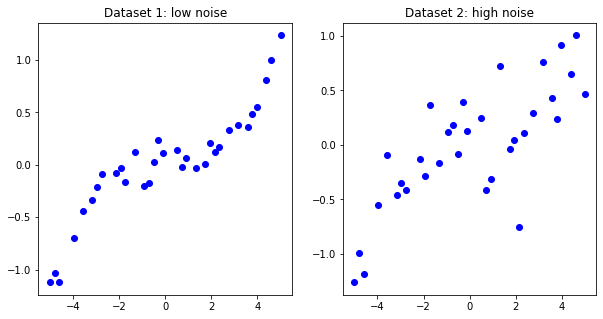

In [ ]:
np.random.seed(10)
# DATASET 1
x1, y1 = generate_toy_data(n_points=50, noise_std=0.1) # generate low noise data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=42) #split data into training and test

# DATASET 2
x2, y2 = generate_toy_data(n_points=50, noise_std=0.4) # generate high noise data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42) #split data into training and test

# Visualize the two datasets in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[1].scatter(x_train2, y_train2, color='blue') # plot dataset 2

ax[0].set_title('Dataset 1: low noise') # set the title for subplot 1
ax[1].set_title('Dataset 2: high noise') # set the title for subplot 2

plt.show() # display the figure

**Exercise 6 (Extra Credit):** Fit a linear regression model to the low noise dataset and a polynomial of degree 3 to the high noise dataset.  Compute training and test MSE for each model.

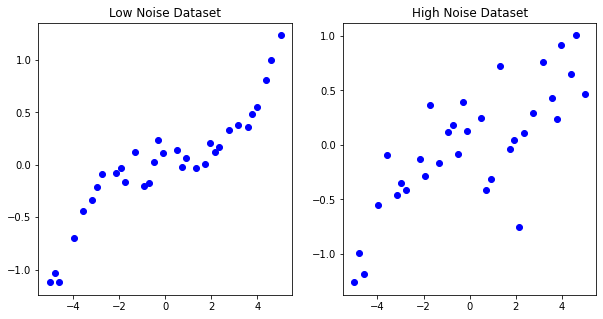

In [ ]:
# Visualize the two models in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2,figsize=(10, 5))

# Step 1:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
## COMPLETE
#
# Step 2:
# Plot the learned polynomial regression model by plotting the model prediction against the training input 
# COMPLETE
#
# ax[0].plot(x_train, y_train_pred, color='red', label='polynomial model')
#
# Step 3:
# Compute and print the training and test MSE.
# COMPLETE
#
# mse_train = ...
# mse_test = ...
#
# print('For low noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(mse_train, mse_test))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[0].set_title('Low Noise Dataset')

# Step 1: 
# Instantiate a sklearn PolynomialFeatures model of degree=3 
# and transform both the training and the testing data to add polynomial features to our datasets.
# (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
## COMPLETE
#
# Step 2:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
## COMPLETE
#
# Step 3:
# Plot the learned polynomial regression model by plotting the model prediction against the training input 
# COMPLETE
#
# ax[1].plot(x_train, y_train_pred, color='red', label='polynomial model')
#
# Step 4:
# Compute and print the training and test MSE.
# COMPLETE
#
# mse_train = ...
# mse_test = ...
#
# print('For high noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(mse_train, mse_test))

ax[1].scatter(x_train2, y_train2, color='blue') # plot dataset 2
ax[1].set_title('High Noise Dataset')

plt.show()

**Exercise 7 (Extra Credit):** Let's compare the way each model fits their respective datasets.

*  **A.** Which model fits the data better, based only on the training and test MSE? Why?

* **B.** Remember that both dataset are generated from $f(x) = x^3$, with this fact in mind, which model is the better fit? Why?

*  **C.** What does this experiment say about using MSE to detect underfitting?